In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [6]:
data = pd.read_csv('ThoracicSurgery.csv')
data.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [5]:
data.columns

Index(['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age', 'Death_1yr'],
      dtype='object')

In [6]:
data.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [7]:
live = data[data['Death_1yr'] == 0]
death = data[data['Death_1yr'] == 1]

cond = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
        'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']

l = [np.mean(live[c]) for c in cond]
d = [np.mean(death[c]) for c in cond]

ld = pd.DataFrame(data={'Attribute': cond, 'Live 1yr Mean': l, 'Death 1yr Mean': d})
ld = ld.set_index('Attribute')

print('Death: {:d}, Live: {:d}' .format(len(death), len(live)))
print("1 year death: {:.2f}% out of 454 patients".format(np.mean(data.Death_1yr)*100))
ld

Death: 69, Live: 385
1 year death: 15.20% out of 454 patients


,Live 1yr Mean,Death 1yr Mean
Attribute,,
FVC,3.304597,3.195072
FEV1,2.540805,2.383188
Performance,0.774026,0.913043
Pain,0.051948,0.101449
Haemoptysis,0.124675,0.202899
Dyspnoea,0.044156,0.115942
Cough,0.677922,0.797101
Weakness,0.158442,0.246377
Tumor_Size,1.683117,2.014493


In [99]:
d = np.array(d)
l = np.array(l)

p_diff = (d-l)/l*100

fig, axes = plt.subplots(2,1,figsize=(12,18))

axes[0].bar(cond, p_diff)
axes[0].set_title('Mean Difference % between Dead and Live 1yr', fontsize=18)
axes[0].set_xticks(cond)
axes[0].set_xticklabels(cond, rotation=90)
axes[0].set_ylabel('Percent', fontsize=13)

NameError: name 'd' is not defined

In [100]:
# Count plot of true/false condition columns

tf_col = ['Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma']
tf_sum = [data[col].sum()/454 for col in tf_col]

axes[1].bar(tf_col, tf_sum)
axes[1].set_xticks(tf_col)
axes[1].set_xticklabels(tf_col, rotation=90)
axes[1].set_ylabel('Proportion of Total Patients', fontsize=13)
axes[1].set_title('Proportion of Patient Conditions before Surgery', fontsize=18)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

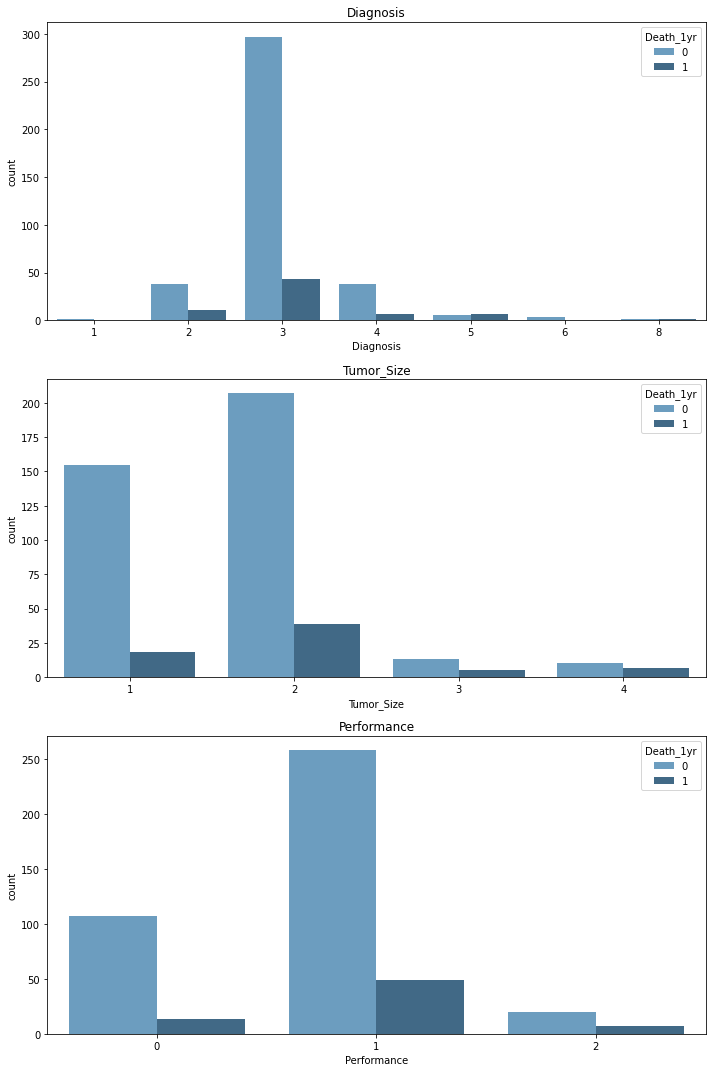

In [11]:
# Count plots of Diagnosis, Tumor_Size, Performance of live and death data

fig, axes = plt.subplots(3,1,figsize=(10,15))

sns.countplot(x='Diagnosis', hue='Death_1yr', data=data, palette='Blues_d', ax=axes[0]).set_title('Diagnosis')
sns.countplot(x='Tumor_Size', hue='Death_1yr', data=data, palette='Blues_d', ax=axes[1]).set_title('Tumor_Size')
sns.countplot(x='Performance', hue='Death_1yr', data=data, palette='Blues_d', ax=axes[2]).set_title('Performance')

plt.tight_layout()

In [3]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

In [4]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [49]:
# Hypothesis testing with Permutations of data
condition = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
            'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']
p_val = []

for c in condition:
    empirical_diff_means = diff_of_means(death[c], live[c])
    perm_replicates = draw_perm_reps(death[c], live[c], diff_of_means, size=10000)
    if empirical_diff_means > 0:
        p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)
    else:
        p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)
        
print(list(zip(condition, p_val)))

[('FVC', 0.1711), ('FEV1', 0.0567), ('Performance', 0.0282), ('Pain', 0.1036), ('Haemoptysis', 0.0643), ('Dyspnoea', 0.0237), ('Cough', 0.0265), ('Weakness', 0.0547), ('Tumor_Size', 0.0007), ('Diabetes_Mellitus', 0.0201), ('MI_6mo', 0.7243), ('PAD', 0.3478), ('Smoking', 0.0607), ('Asthma', 0.7205), ('Age', 0.2813)]


In [50]:
# Hypothesis testing with Permutations of data
condition = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
            'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']
p_val = []

for c in condition:
    empirical_diff_means = diff_of_means(death[c], live[c])
    perm_replicates = draw_perm_reps(death[c], live[c], diff_of_means, size=10000)
    if empirical_diff_means > 0:
        p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)
    else:
        p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)
        
print(list(zip(condition, p_val)))

[('FVC', 0.1704), ('FEV1', 0.0572), ('Performance', 0.0309), ('Pain', 0.1009), ('Haemoptysis', 0.0619), ('Dyspnoea', 0.0246), ('Cough', 0.031), ('Weakness', 0.0586), ('Tumor_Size', 0.0002), ('Diabetes_Mellitus', 0.0205), ('MI_6mo', 0.7097), ('PAD', 0.3481), ('Smoking', 0.0611), ('Asthma', 0.7198), ('Age', 0.2825)]


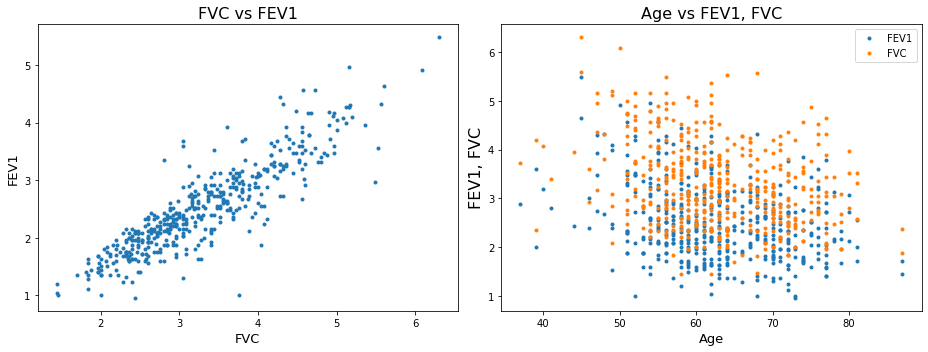

In [53]:
# Scatter plot for FVC, FEV1, Age columns

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(data.FVC, data.FEV1, linestyle='none', marker='.')

axes[0].set_xlabel('FVC', fontsize=13)
axes[0].set_ylabel('FEV1', fontsize=13)
axes[0].set_title('FVC vs FEV1', fontsize=16)

axes[1].plot(data.Age, data.FEV1, linestyle='none', marker='.', label='FEV1')
axes[1].plot(data.Age, data.FVC, linestyle='none', marker='.', label='FVC')
axes[1].set_xlabel('Age', fontsize=13)
axes[1].set_ylabel('FEV1, FVC', fontsize=16)
axes[1].legend()
axes[1].set_title('Age vs FEV1, FVC', fontsize=16)

plt.tight_layout()

In [54]:
# Correlation coefficients for FVC and FEV1
np.corrcoef(data.FVC, data.FEV1)[0,1]

0.8875452733829

In [55]:
# Correlation coefficients for Age and FVC
np.corrcoef(data.Age, data.FVC)[0,1]

-0.29942991966049093

In [56]:
# Correlation coefficients for Age and FEV1
np.corrcoef(data.Age, data.FEV1)[0,1]

-0.30961662730798906

In [60]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurments."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

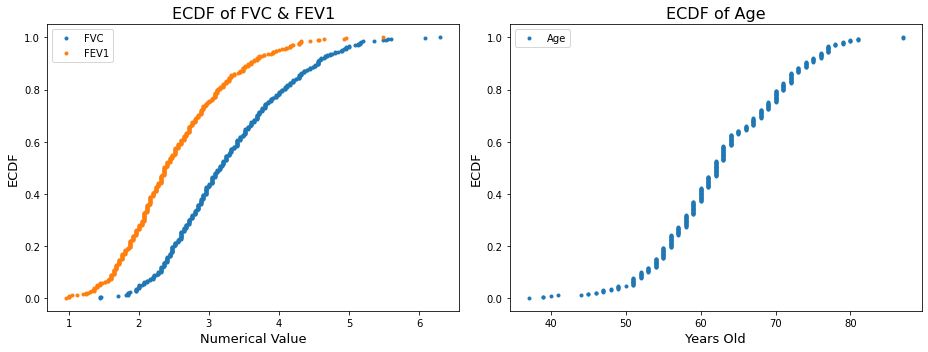

In [61]:
# ECDF of FVC, FEV1, Age
x_fvc, y_fvc = ecdf(data.FVC)
x_fev1, y_fev1 = ecdf(data.FEV1)
x_age, y_age = ecdf(data.Age)

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(x_fvc, y_fvc, marker='.', linestyle='none', label='FVC')
axes[0].plot(x_fev1, y_fev1, marker='.', linestyle='none', label='FEV1')

axes[0].set_xlabel('Numerical Value', fontsize=13)
axes[0].set_ylabel('ECDF', fontsize=13)
axes[0].legend(loc='upper left')
axes[0].set_title('ECDF of FVC & FEV1', fontsize=16)

axes[1].plot(x_age, y_age, marker='.', linestyle='none', label='Age')
axes[1].set_xlabel('Years Old', fontsize=13)
axes[1].set_ylabel('ECDF', fontsize=13)
axes[1].legend(loc='upper left')
axes[1].set_title('ECDF of Age', fontsize=16)
plt.tight_layout()

In [65]:
# Shape of csv data
data.shape

(454, 17)

In [66]:
# Checking the information of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diagnosis          454 non-null    int64  
 1   FVC                454 non-null    float64
 2   FEV1               454 non-null    float64
 3   Performance        454 non-null    int64  
 4   Pain               454 non-null    int64  
 5   Haemoptysis        454 non-null    int64  
 6   Dyspnoea           454 non-null    int64  
 7   Cough              454 non-null    int64  
 8   Weakness           454 non-null    int64  
 9   Tumor_Size         454 non-null    int64  
 10  Diabetes_Mellitus  454 non-null    int64  
 11  MI_6mo             454 non-null    int64  
 12  PAD                454 non-null    int64  
 13  Smoking            454 non-null    int64  
 14  Asthma             454 non-null    int64  
 15  Age                454 non-null    int64  
 16  Death_1yr          454 non

In [91]:
# Finding the Null Values
data.isnull().sum()

Diagnosis            0
FEV1                 0
Performance          0
Pain                 0
Haemoptysis          0
Dyspnoea             0
Cough                0
Weakness             0
Tumor_Size           0
Diabetes_Mellitus    0
MI_6mo               0
Smoking              0
Asthma               0
Age                  0
Death_1yr            0
dtype: int64

In [117]:
data = data.drop(['FVC'], axis=1, errors='ignore')
data

,Diagnosis,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,Smoking,Asthma,Age,Death_1yr
0,2,2.16,1,0,0,0,1,1,4,0,0,1,0,60,0
1,3,1.88,0,0,0,0,0,0,2,0,0,1,0,51,0
2,3,2.08,1,0,0,0,1,0,1,0,0,1,0,59,0
3,3,3.04,0,0,0,0,0,0,1,0,0,0,0,54,0
4,3,0.96,2,0,1,0,1,1,1,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,2,2.12,1,0,0,0,1,0,3,0,0,1,0,63,0
450,3,3.12,0,0,0,0,0,0,1,0,0,1,0,61,0
451,3,2.08,1,0,0,0,1,0,3,0,0,0,0,52,0
452,3,1.68,1,0,0,0,1,1,2,0,0,1,0,79,0


In [114]:
# Splitting independent and dependent variables
x = data.iloc[:,0:14].values
y = data.iloc[:,14:15].values

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [116]:
print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of x_train (363, 14)
Shape of y_train (363, 1)
Shape of x_test (91, 14)
Shape of y_test (91, 1)


In [117]:
# standard scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [118]:
# Model Building Decision Tree Model
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [119]:
# RandomForest Model
def randomForest(x_train, x_test, y_train, y_test):
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [120]:
# KNN Model
def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    yPred = knn.predict(x_test)
    print('***KNeighborsClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [121]:
# Xgboost Model
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [122]:
def compareModel(x_train, x_test, y_train, y_test):
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    KNN(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train, x_test, y_train, y_test)

In [123]:
compareModel(x_train, x_test, y_train, y_test)

***DecisionTreeClassifier***
Confusion matrix
[[90  0]
 [ 1  0]]
Classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       0.00      0.00      0.00         1

    accuracy                           0.99        91
   macro avg       0.49      0.50      0.50        91
weighted avg       0.98      0.99      0.98        91

----------------------------------------------------------------------------------------------------
***DecisionTreeClassifier***
Confusion matrix
[[90  0]
 [ 1  0]]
Classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       0.00      0.00      0.00         1

    accuracy                           0.99        91
   macro avg       0.49      0.50      0.50        91
weighted avg       0.98      0.99      0.98        91

-----------------------------------------------------------------------

C:\Users\91630\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91630\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91630\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91630\AppData\Local\Temp/ipykernel_26716/10692

***GradientBoostingClassifier***
Confusion matrix
[[90  0]
 [ 1  0]]
Classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       0.00      0.00      0.00         1

    accuracy                           0.99        91
   macro avg       0.49      0.50      0.50        91
weighted avg       0.98      0.99      0.98        91



C:\Users\91630\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91630\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91630\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)

C:\Users\91630\AppData\Local\Temp/ipykernel_26716/1724286394.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [125]:
f1_score(yPred,y_test,average='weighted')

0.994475138121547

In [126]:
cv = cross_val_score(rf,x,y,cv=5)
np.mean(cv)

C:\Users\91630\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91630\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\91630\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\91630\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

0.9956043956043956